In [ ]:
%pip install opendatasets

In [ ]:
%pip install pandas

In [ ]:
%pip install missingno

In [1]:
import opendatasets as od 
import pandas as pd
import numpy as np
import os

if not os.path.exists('steam-games-dataset'):
    od.download( 
        "https://www.kaggle.com/datasets/fronkongames/steam-games-dataset/data") 
    
if not os.path.exists('steam-video-games'):
    od.download( 
        "https://www.kaggle.com/datasets/tamber/steam-video-games/data") 
    
if not os.path.exists('popularity-of-games-on-steam'):
    od.download( 
        "https://www.kaggle.com/datasets/michau96/popularity-of-games-on-steam") 

In [2]:
import pandas as pd

In [3]:
game_popularity = pd.read_csv('popularity-of-games-on-steam/SteamCharts.csv', encoding='ISO-8859-1')
steam_games = pd.read_csv('steam-games-dataset/games.csv', encoding='ISO-8859-1')
user_data = pd.read_csv('steam-video-games/steam-200k.csv', encoding='ISO-8859-1', usecols=[0, 1, 2, 3], names=['UserID', 'Game', 'Behavior', 'Quantity'])
# Note: Behvior is either purchase or play. When behavior is purchase, quantity is always 1. When behavior is play, quantity is the number of hours

Brainstorm:
Step 1: If the user does not have any previous games played from the model above....print NONE (retrive a list of users with no         games for presentation)
Step 2: Create a function that grabs the following [Game ID, Game Title, Total Hours Played, Release Date, Total Postive Reviews/Total Reviews] and Displays the Top 10 Recommendations based on positve_reviews, engagement, and release_date

    Step 2a: Call "steam_games" attributes [AppId, Name, Release Date, Postive, Negative, Average Playtime Forever]
             Aggregate "steam_games" to present total hours played and total postive reviews for each game (name: game_stats)
    Step 2b: Verify that the data is good by extracting the file as a .csv and manually check all datapoints
    Step 2c: Fix any errors (list errors below as needed)
             [] Fixed through .drop() of outliers of no reviews, no engagement
             NOTE: some games have weird characters, but the characters are of different languages (Korean, Russian, etc.)
             NOTE: did not drop 'hours_played' as it is believed to be inaccurate but still useful to an extent.
    Step 2d: Generate an attribute that will highlight the most rated with the best rating games. Set dataset in descending order and populate the top 100. 
    
Step 3: Recommend 10 random games from the top 100 through an automatic link that takes the user directly to Steam to view the game.

In [4]:
# Step 2a-2d

# Grab the desired attributes from desired dataset
game_stats = pd.read_csv('steam-games-dataset/games.csv', encoding='ISO-8859-1', usecols = [0, 1, 2, 22, 23, 28])

# Get total # of positive reviews in the dataset
tot_pos_reviews = (game_stats['Positive'].sum())

# To get the game that has most positive reviews amoungst the most reviewed game 
game_stats['ranking'] = np.sqrt(game_stats['Positive']/tot_pos_reviews) * 100.0

# Compute the postive rating percentage for each game (Total Positive/(Total Positive + Total Negative) * 100), formatted and replace 'NaN' with 0
game_stats['rating'] = ((game_stats['Positive'] / (game_stats['Positive']+game_stats['Negative'])) * 100).round(2).fillna(0)

# Rename columns for ease
game_stats.rename(columns={'AppID': 'game_id','Name':'game_name','Average playtime forever':'hours_played', 'Release date': "release_date"}, inplace=True)

### Count of possible recommendations before outlier removal: 85,097
game_stats = game_stats.drop(game_stats[game_stats['Positive'] == 0].index)

### Count of possible recommendations after outlier removal: 61,789
#print(len(game_stats))
game_stats.head(3)

,game_id,game_name,release_date,Positive,Negative,hours_played,ranking,rating
0,20200,Galactic Bowling,"Oct 21, 2008",6,11,0,0.027120,35.29
1,655370,Train Bandit,"Oct 12, 2017",53,5,0,0.080604,91.38
3,1355720,Henosisâ¢,"Jul 23, 2020",3,0,0,0.019177,100.00


In [5]:
# Step 3a

game_stats = game_stats.sort_values(by=['ranking','hours_played', 'release_date'], ascending=[False, False, False])
game_stats.head(10)

,game_id,game_name,release_date,Positive,Negative,hours_played,ranking,rating
46158,730,Counter-Strike: Global Offensive,"Aug 21, 2012",5764420,766677,30484,26.582482,88.26
17585,570,Dota 2,"Jul 9, 2013",1477153,300437,37162,13.456449,83.10
57205,271590,Grand Theft Auto V,"Apr 13, 2015",1171197,210154,13650,11.982093,84.79
8885,578080,PUBG: BATTLEGROUNDS,"Dec 21, 2017",1154655,895978,21963,11.897175,56.31
46416,105600,Terraria,"May 16, 2011",964983,21044,6729,10.876209,97.87
8256,359550,Tom Clancy's Rainbow SixÂ® Siege,"Dec 1, 2015",929372,138530,13837,10.673639,87.03
30583,440,Team Fortress 2,"Oct 10, 2007",823693,56683,9916,10.048481,93.56
1289,4000,Garry's Mod,"Nov 29, 2006",822326,29004,10891,10.040139,96.59
35001,252490,Rust,"Feb 8, 2018",703687,108223,16623,9.287685,86.67
39530,550,Left 4 Dead 2,"Nov 16, 2009",619457,16204,2166,8.714115,97.45


In [6]:
# If you want to print the dataset
game_stats.to_csv('game_stats.csv')

In [6]:
# Step 3b
import random

# These are the values to print the links to Steam
game_stats2 = game_stats[['game_id', 'game_name']]

# New dataframe o the top 100 popular games
recommendations = game_stats2.head(100)

# Creates a 2D array, library "random" does NOT handle selection from 2D array
#top_hund = recommendations.to_numpy(dtype=str)

# Create a list, library "random" handles selection from a nested list
top_hund = recommendations.values.tolist()

# Randomly sample (without duplication) 10 games from the top 100
rand_ten = random.sample(top_hund, 10)
print("\n\tYOUR TOP 10 RECOMMENDATIONS FOR MODEL 1: ")
print("(*)------------------------------------------------(*)")

#  Grab the 10, iterate through the nested list to print each in link format
for i in range(len(rand_ten)):
    for j in range(len(rand_ten[0])):
        if j == 0:
            appid = rand_ten[i][j]
        elif j == 1:
            gamename = rand_ten[i][j]
    # Convert the integer into str to concat into link
    appid = "% s" % appid
    print(gamename,  ':\n\t https://store.steampowered.com/app/' + appid)
print("(*)------------------------------------------------(*)")


	YOUR TOP 10 RECOMMENDATIONS FOR MODEL 1: 
(*)------------------------------------------------(*)
ELDEN RING :
	 https://store.steampowered.com/app/1245620
Stellaris :
	 https://store.steampowered.com/app/281990
BeamNG.drive :
	 https://store.steampowered.com/app/284160
Wallpaper Engine :
	 https://store.steampowered.com/app/431960
Z1 Battle Royale :
	 https://store.steampowered.com/app/433850
Tom Clancy's Rainbow SixÂ® Siege :
	 https://store.steampowered.com/app/359550
Arma 3 :
	 https://store.steampowered.com/app/107410
DOOM :
	 https://store.steampowered.com/app/379720
Deep Rock Galactic :
	 https://store.steampowered.com/app/548430
Halo: The Master Chief Collection :
	 https://store.steampowered.com/app/976730
(*)------------------------------------------------(*)


In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

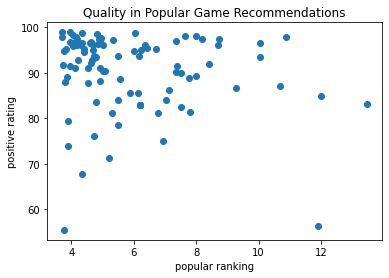

In [8]:
# These are the values needed for the chart (grab only top 100)
game_stats3 = game_stats[['game_name','ranking', 'rating']]
recomm_stats3 = game_stats3.head(100)

# Drop the single outlier with a ranking of 26.58 (IF REMOVE THIS LINE, GET THE SAME PICTURE/STORY BELOW)
# ***This is just for the beauty as we know the data points, not automated to new data ***
recomm_stats4 = recomm_stats3.drop(recomm_stats3[recomm_stats3['ranking'] > 20].index)

# Plot scatter, label the axis and title
x = np.array(recomm_stats4['ranking'])
y = np.array(recomm_stats4['rating'])

plt.scatter(x, y, label='here')
plt.title("Quality in Popular Game Recommendations")
plt.xlabel('popular ranking')
plt.ylabel('positive rating')
plt.show()

# Explaination: (Disclaimer: removed the one outlier that had a popular 
#                rank of 26.58 to improve scope of trend) This displays the
#                top 100 popular games. This ensures that the user could 
#                potentially enjoy the game according to other users 
#                Majority of the top 100 are above 80% in positive rating.